# Final Project : Weather forcast

---
* Author:  
<font size="4">   6042712826 Korpong    Sirikunsathit </font>  
<font size="4">   6042816426 Butsaranee Nonnatee</font>
* Chulalongkorn Business School, Thailand
---

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('GFYwJurWvcE', width=720, height=405)

---
- Thai Meteorological Department : Weather data source  
http://www.rnd.tmd.go.th/bigdata.php
- ASOS meta-data explanation  
https://cran.r-project.org/web/packages/riem/vignettes/riem_package.html
- Weather study guide : decoding METAR weather report format  
http://meteocentre.com/doc/metar.html
- Thai Meteorological Department : QA session : What factor requride to forcast weather?   
https://www.tmd.go.th/info/info.php?FileID=84
---

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
# ทำการ loop เพื่อนดึงข้อมูลหลายๆไฟล์ที่เก็บไว้บน website github โดยทำการดึงข้อมูลตั้งแต่ปี 2011 - 2018 เข้ามาเก็บไว้เป็น list ข้อมูล 

year = [2011,2012,2013,2014,2015,2016,2017,2018]
data = []

for i in year :
    weather = pd.read_csv(f'https://raw.githubusercontent.com/korpong-si/propk/master/TH_weather/decode_{i}.txt',
                          sep=',', 
                          low_memory=False,
                          parse_dates = ['valid'])
    
    weather = weather[weather.station == 'VTBU']
    data.append(weather)

In [3]:
# นำ list ข้อมูลที่ได้นำมาเชื่อมกันเป็นตารางเดียวโดยมีการกำหนดชื่อ column ขึ้นมาใหม่

weather = pd.concat(data, ignore_index=True,sort = False)
col = ['station', 'valid', 'tmpc', 'dwpc', 'relh', 'drct', 'sknt',
       'alti', 'mslp','p01m', 'vsby', 'gust', 'gust_mph', 'skyc1',
       'skyc2', 'skyc3', 'skyl1', 'skyl2', 'skyl3', 'presentwx', 'sped']

weather.columns = col

## Descriptive Analytics

Data avaliable                                                                                 | required for prediction methods                
--------------------------------------------------------------------------------------------------|-----------------------------------------------------
 1  station : three or four character site identifier                                             |                                                             
 2  valid   : timestamp of the observation (UTC)                                                  |                                                           
 3  tmpc    : Air Temperature in celsius, typically @ 2 meters                                    | 2. อุณหภูมิของอากาศ ดินในความลึกระดับต่าง ๆ และน้ำ (celsius) 
 4  dwpc    : Dew Point Temperature in celsius, typically @ 2 meters                              |                                                         
 5  relh    : Relative Humidity in %                                                              | 5. ความชื้นสัมพัทธ์ของอากาศ มีหน่วยเป็น " เปอร์เซ็นต์ "         
 6  drct    : Wind Direction in degrees from north                                                | 4. ทิศทางลม มีหน่วยเป็น " องศา " (degrees)               
 7  sknt    : Wind Speed in knots                                                                 | 3. ความเร็วลมผิวพื้นและชั้นบน มีหน่วยเป็น " น็อต " (knots)     
 8  alti    : Pressure altimeter in inches                                                        | 1. ความกดของบรรยากาศมีหน่วยเป็น " นิ้ว " (inch)   
 9  mslp    : Sea Level Pressure in millibar                                                      | 
 10 p01m    : One hour precipitation for the period from the observation time in millimeters.     | 6. หยาดน้ำฟ้า มีหน่วยเป็น " มิลลิเมตร " (millimeters)            
 11 vsby    : Visibility in km                                                                    | 10. ทัศนวิสัย มีหน่วยเป็น " เมตร หรือ กิโลเมตร "              
 12 gust    : Wind Gust in knots                                                                  | 3. ความเร็วลมผิวพื้นและชั้นบน มีหน่วยเป็น " น็อต " (knots)             
 13 skyc1   : Sky Level 1 Coverage                                                                |                                                       
 14 skyc2   : Sky Level 2 Coverage                                                                |                                                            
 15 skyc3   : Sky Level 3 Coverage                                                                |                                                            
 16 skyl1   : Sky Level 1 Altitude in feet                                                        | 11. ความสูงของฐานเมฆ มีหน่วยเป็น " เมตร หรือ ฟุต "             
 17 skyl2   : Sky Level 2 Altitude in feet                                                        |                                                        
 18 skyl3   : Sky Level 3 Altitude in feet                                                        |                                                      
 19 presentwx: Present Weather Codes                                                              |  
                                                                                                  | 7. การระเหยของน้ำ มีหน่วยเป็น " มิลลิเมตร " (millimeters)   
                                                                                                  | 8. ปริมาณรังสี มีหน่วยเป็น " mw "                               
                                                                                                  | 9. ความยาวนานของแสงแดด มีหน่วยเป็น " ชั่วโมง "              
        


In [4]:
weather

,station,valid,tmpc,dwpc,relh,drct,sknt,alti,mslp,p01m,...,gust,gust_mph,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,presentwx,sped
0,VTBU,2011-07-02 05:00:00,29.00,25.00,79.04,190.00,4.00,29.80,M,0.00,...,M,M,FEW,SCT,BKN,2000.00,4000.00,12000.00,M,NaN
1,VTBU,2011-07-02 05:30:00,29.00,25.00,79.04,180.00,4.00,29.80,M,0.00,...,M,M,FEW,SCT,BKN,2000.00,4000.00,12000.00,M,NaN
2,VTBU,2011-07-02 06:00:00,29.00,25.00,79.04,200.00,6.00,29.79,M,0.00,...,M,M,FEW,SCT,BKN,2000.00,4000.00,12000.00,M,NaN
3,VTBU,2011-07-02 06:30:00,30.00,26.00,79.18,190.00,6.00,29.78,M,0.00,...,M,M,FEW,BKN,BKN,2000.00,12000.00,30000.00,M,NaN
4,VTBU,2011-07-02 07:00:00,30.00,26.00,79.18,200.00,6.00,29.78,M,0.00,...,M,M,FEW,BKN,BKN,2000.00,12000.00,30000.00,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109937,VTBU,2018-03-27 21:30:00,25.00,23.00,88.67,20.00,4.00,29.80,M,0,...,M,NaN,FEW,M,M,2000.00,M,M,BR,NaN
109938,VTBU,2018-03-27 22:00:00,26.00,23.00,83.55,110.00,2.00,29.80,M,0,...,M,NaN,FEW,M,M,2000.00,M,M,BR,NaN
109939,VTBU,2018-03-27 22:30:00,26.00,23.00,83.55,180.00,2.00,29.83,M,0,...,M,NaN,FEW,M,M,2000.00,M,M,BR,NaN
109940,VTBU,2018-03-27 23:00:00,25.00,23.00,88.67,330.00,4.00,29.83,M,0,...,M,NaN,FEW,M,M,2000.00,M,M,BR,NaN


# Data Preparation

In [5]:
# ดูค่า unique ของแต่ละ column เพื่อดูรูปแบบของข้อมูล

for i in weather.columns:
    print(f'[{i} : {weather[i].unique()}]')
    print ('-' * 80)

[station : ['VTBU']]
--------------------------------------------------------------------------------
[valid : ['2011-07-02T05:00:00.000000000' '2011-07-02T05:30:00.000000000'
 '2011-07-02T06:00:00.000000000' ... '2018-03-27T22:30:00.000000000'
 '2018-03-27T23:00:00.000000000' '2018-03-27T23:30:00.000000000']]
--------------------------------------------------------------------------------
[tmpc : ['29.00' '30.00' '28.00' '25.00' '24.00' '26.00' '27.00' 'M' '31.00'
 '32.00' '34.00' '33.00' '19.00' '23.00' '22.00' '20.00' '35.00' '21.00'
 '17.00' '11.00' '36.00' '3.00' '37.00' '38.00' '39.00' '2.00' '12.00'
 '18.00' '16.00' '15.00' '14.00' '13.00' '10.00' '7.00']]
--------------------------------------------------------------------------------
[dwpc : ['25.00' '26.00' '24.00' '23.00' 'M' '35.00' '20.00' '4.00' '27.00'
 '22.00' '21.00' '19.00' '18.00' '17.00' '14.00' '10.00' '29.00' '16.00'
 '15.00' '13.00' '11.00' '2.00' '6.00' '28.00' '34.00' '12.00' '8.00'
 '9.00' '7.00' '5.00' '225.0

## จัดการกับข้อมูล Continuous

In [6]:
#แทนค่า M ในตารางข้อมูลด้วยค่า NaN

weather = weather.replace( 'M', np.nan)

In [7]:
# เปลี่ยนข้อมูลให้อยู่ในรูปแบบ float ทั้งหมดเพื่อให้นำมาคำนวณหาค่า mean ได้

col = ['tmpc', 'dwpc', 'relh', 'drct', 'sknt', 'alti', 'mslp', 'p01m',
       'vsby', 'gust', 'gust_mph', 'skyl1', 'skyl2', 'skyl3', 'sped']
for i in col:
    weather[i] = weather[i].astype('float')

In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109942 entries, 0 to 109941
Data columns (total 21 columns):
station      109942 non-null object
valid        109942 non-null datetime64[ns]
tmpc         108230 non-null float64
dwpc         108220 non-null float64
relh         108210 non-null float64
drct         108999 non-null float64
sknt         108272 non-null float64
alti         108235 non-null float64
mslp         0 non-null float64
p01m         100931 non-null float64
vsby         108259 non-null float64
gust         36 non-null float64
gust_mph     7 non-null float64
skyc1        109852 non-null object
skyc2        78140 non-null object
skyc3        32426 non-null object
skyl1        100427 non-null float64
skyl2        75527 non-null float64
skyl3        25482 non-null float64
presentwx    37256 non-null object
sped         15571 non-null float64
dtypes: datetime64[ns](1), float64(15), object(5)
memory usage: 17.6+ MB


In [9]:
# ลบ error value column และ columns ที่มีจำนวนข้อมูลน้อย

weather = weather.drop(columns = ['station','mslp','gust','gust_mph','sped'])

In [10]:
# นำข้อมูลทั้ง column มาหาค่า mean เพื่อนำไปแทนค่าในข้อมูลที่เป็นค่า NaN

col = ['tmpc', 'dwpc', 'relh', 'drct', 'sknt', 'alti', 'p01m', 'vsby', 'skyl1', 'skyl2', 'skyl3']
for i in col:
    weather[i] = weather[i].fillna((weather[i].mean(numeric_only=False)))

In [11]:
weather

,valid,tmpc,dwpc,relh,drct,sknt,alti,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,presentwx
0,2011-07-02 05:00:00,29.0,25.0,79.04,190.0,4.0,29.80,0.0,6.21,FEW,SCT,BKN,2000.0,4000.00000,12000.00000,NaN
1,2011-07-02 05:30:00,29.0,25.0,79.04,180.0,4.0,29.80,0.0,6.21,FEW,SCT,BKN,2000.0,4000.00000,12000.00000,NaN
2,2011-07-02 06:00:00,29.0,25.0,79.04,200.0,6.0,29.79,0.0,6.21,FEW,SCT,BKN,2000.0,4000.00000,12000.00000,NaN
3,2011-07-02 06:30:00,30.0,26.0,79.18,190.0,6.0,29.78,0.0,6.21,FEW,BKN,BKN,2000.0,12000.00000,30000.00000,NaN
4,2011-07-02 07:00:00,30.0,26.0,79.18,200.0,6.0,29.78,0.0,6.21,FEW,BKN,BKN,2000.0,12000.00000,30000.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109937,2018-03-27 21:30:00,25.0,23.0,88.67,20.0,4.0,29.80,0.0,1.86,FEW,NaN,NaN,2000.0,20075.15458,22584.00832,BR
109938,2018-03-27 22:00:00,26.0,23.0,83.55,110.0,2.0,29.80,0.0,1.86,FEW,NaN,NaN,2000.0,20075.15458,22584.00832,BR
109939,2018-03-27 22:30:00,26.0,23.0,83.55,180.0,2.0,29.83,0.0,1.86,FEW,NaN,NaN,2000.0,20075.15458,22584.00832,BR
109940,2018-03-27 23:00:00,25.0,23.0,88.67,330.0,4.0,29.83,0.0,1.86,FEW,NaN,NaN,2000.0,20075.15458,22584.00832,BR


## จัดการข้อมูล date time

In [12]:
weather['month'] = weather['valid'].dt.month
weather['hour']  = weather['valid'].dt.strftime("%H:%M:%S")
weather['day']   = weather['valid'].dt.day
weather['year']   = weather['valid'].dt.year
weather.drop(columns = ['valid'],inplace = True)

In [13]:
# เรียง column ใน dataframe ใหม่

weather = weather[['day', 'month', 'year', 'hour', 'tmpc', 'dwpc',
                   'relh', 'drct', 'sknt', 'alti', 'p01m', 'vsby', 
                   'skyc1', 'skyc2', 'skyc3', 'skyl1', 'skyl2', 'skyl3', 'presentwx']]

## จัดการกับข้อมูลที่เป็น discrete

In [14]:
weather['skyc1'] = weather['skyc1'].fillna(weather['skyc1'].value_counts().index[0])
weather['skyc1'] = weather['skyc1'].str.replace('   ',weather['skyc1'].value_counts().index[0])

In [15]:
weather['skyc2'] = weather['skyc2'].fillna(weather['skyc2'].value_counts().index[0])
weather['skyc2'] = weather['skyc2'].str.replace('   ',weather['skyc2'].value_counts().index[0])

In [16]:
weather['skyc3'] = weather['skyc3'].fillna(weather['skyc3'].value_counts().index[0])
weather['skyc3'] = weather['skyc3'].str.replace('   ',weather['skyc3'].value_counts().index[0])

## จัดการกับข้อมูล target class

In [17]:
# ลบบาง row ที่ไม่มี target class ออก

del_target = weather[weather['presentwx'].isna()]
weather.drop(del_target.index,inplace=True)

In [18]:
weather

,day,month,year,hour,tmpc,dwpc,relh,drct,sknt,alti,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,presentwx
11,2,7,2011,15:00:00,25.0,24.0,94.19,320.0,8.0,29.81,0.0,4.35,FEW,SCT,BKN,1800.0,4000.00000,12000.00000,-SHRA
12,2,7,2011,18:00:00,24.0,23.0,94.14,20.0,3.0,29.81,0.0,3.73,FEW,SCT,BKN,1800.0,3500.00000,11000.00000,-RA
13,2,7,2011,20:00:00,25.0,24.0,94.19,0.0,0.0,29.79,0.0,3.73,FEW,SCT,BKN,1800.0,3500.00000,11000.00000,-RA
8637,10,1,2012,19:30:00,26.0,19.0,65.33,10.0,3.0,29.89,0.0,3.11,FEW,BKN,BKN,2500.0,12000.00000,22584.00832,BR
9117,21,1,2012,01:00:00,26.0,24.0,88.75,0.0,0.0,29.83,0.0,4.35,FEW,SCT,BKN,1800.0,30000.00000,22584.00832,VCSH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109937,27,3,2018,21:30:00,25.0,23.0,88.67,20.0,4.0,29.80,0.0,1.86,FEW,SCT,BKN,2000.0,20075.15458,22584.00832,BR
109938,27,3,2018,22:00:00,26.0,23.0,83.55,110.0,2.0,29.80,0.0,1.86,FEW,SCT,BKN,2000.0,20075.15458,22584.00832,BR
109939,27,3,2018,22:30:00,26.0,23.0,83.55,180.0,2.0,29.83,0.0,1.86,FEW,SCT,BKN,2000.0,20075.15458,22584.00832,BR
109940,27,3,2018,23:00:00,25.0,23.0,88.67,330.0,4.0,29.83,0.0,1.86,FEW,SCT,BKN,2000.0,20075.15458,22584.00832,BR


In [19]:
weather.presentwx.unique()

array(['-SHRA', '-RA', 'BR', 'VCSH', 'VCSH/BR', 'VCSH BR', '-RABR', 'SH',
       'TS/BR', 'HZ', '-RA BR', '-SHRA BR', 'TS BR', '-TSRA BR', '-TSRA',
       'TS', 'TSRA', 'TSRA BR', 'SHRA/BR', 'VCTS', 'BR TS', 'BR VCSH',
       'BR -SHRA', 'BR -RA', 'SHRA', 'VCSH HZ', 'VCTS SH', 'RA', '+TSRA',
       '- RA', 'TS VCSH HZ', 'TS HZ', 'FG', '+TSRA BR', 'SHRA BR',
       'SH BR', 'TS SH BR', 'SH/BR', 'TS SH', '+RA', 'TS VCSH', 'VCTS BR',
       'RA BR', 'SH HZ', '-TSRA HZ', 'BR SH', '+SHRA', 'MIFG', '+SHRA BR',
       'VCTS VCSH', 'HZ SH', 'TS SH HZ', 'MIFG BR', '- RA BR', '+RA BR'],
      dtype=object)

In [20]:
# นำตัวอักษรที่เป็นค่า prefix ออกเพื่อให้เหลือแต่ค่าพยากรณ์

clean_target = ['-','+','\s','MI','PR','BL','BC','DR','FZ','/']
for i in clean_target :
    weather['presentwx'] = weather['presentwx'].str.replace(i,'')

In [21]:
weather['presentwx'].value_counts()

BR          23252
HZ           7090
RA           1492
RABR          908
TS            874
TSRA          697
VCSH          600
TSRABR        499
SHRA          385
VCTS          354
TSBR          299
SH            287
SHRABR        151
SHBR          116
TSSH           72
FG             45
SHHZ           24
BRRA           19
TSSHBR         15
TSVCSH         15
TSHZ           14
VCSHBR          9
VCTSSH          8
BRSH            6
BRVCSH          5
BRTS            3
FGBR            3
TSRAHZ          3
VCTSVCSH        3
VCTSBR          2
VCSHHZ          2
BRSHRA          1
HZSH            1
TSVCSHHZ        1
TSSHHZ          1
Name: presentwx, dtype: int64

In [22]:
# กระจายค่า target class ของข้อมูลที่มีมากกว่า 1 target class

weather['1']=weather['presentwx'].str[0:2]
weather['2']=weather['presentwx'].str[2:4]
weather['3']=weather['presentwx'].str[4:6]
weather['4']=weather['presentwx'].str[6:8]
weather

,day,month,year,hour,tmpc,dwpc,relh,drct,sknt,alti,...,skyc2,skyc3,skyl1,skyl2,skyl3,presentwx,1,2,3,4
11,2,7,2011,15:00:00,25.0,24.0,94.19,320.0,8.0,29.81,...,SCT,BKN,1800.0,4000.00000,12000.00000,SHRA,SH,RA,,
12,2,7,2011,18:00:00,24.0,23.0,94.14,20.0,3.0,29.81,...,SCT,BKN,1800.0,3500.00000,11000.00000,RA,RA,,,
13,2,7,2011,20:00:00,25.0,24.0,94.19,0.0,0.0,29.79,...,SCT,BKN,1800.0,3500.00000,11000.00000,RA,RA,,,
8637,10,1,2012,19:30:00,26.0,19.0,65.33,10.0,3.0,29.89,...,BKN,BKN,2500.0,12000.00000,22584.00832,BR,BR,,,
9117,21,1,2012,01:00:00,26.0,24.0,88.75,0.0,0.0,29.83,...,SCT,BKN,1800.0,30000.00000,22584.00832,VCSH,VC,SH,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109937,27,3,2018,21:30:00,25.0,23.0,88.67,20.0,4.0,29.80,...,SCT,BKN,2000.0,20075.15458,22584.00832,BR,BR,,,
109938,27,3,2018,22:00:00,26.0,23.0,83.55,110.0,2.0,29.80,...,SCT,BKN,2000.0,20075.15458,22584.00832,BR,BR,,,
109939,27,3,2018,22:30:00,26.0,23.0,83.55,180.0,2.0,29.83,...,SCT,BKN,2000.0,20075.15458,22584.00832,BR,BR,,,
109940,27,3,2018,23:00:00,25.0,23.0,88.67,330.0,4.0,29.83,...,SCT,BKN,2000.0,20075.15458,22584.00832,BR,BR,,,


In [23]:
# แปลงข้อมูลที่มีมากกว่า 2 target ให้กลายเป็นข้อมูลที่มีเพียง 1 target class

df = pd.melt(weather,
             id_vars=['day','month','year','hour','tmpc', 'dwpc', 'relh', 'drct', 'sknt', 'alti', 'p01m', 'vsby', 'skyc1','skyc2', 'skyc3', 'skyl1', 'skyl2', 'skyl3', 'presentwx'],
             var_name = 'x', 
             value_name='target')
df.drop(columns = 'x' , inplace=True)
df = df.replace( '', np.nan)
df.dropna(inplace=True)
df.drop(columns = 'presentwx' , inplace=True)
df

,day,month,year,hour,tmpc,dwpc,relh,drct,sknt,alti,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,target
0,2,7,2011,15:00:00,25.0,24.0,94.19,320.0,8.0,29.81,0.0,4.35,FEW,SCT,BKN,1800.0,4000.0,12000.00000,SH
1,2,7,2011,18:00:00,24.0,23.0,94.14,20.0,3.0,29.81,0.0,3.73,FEW,SCT,BKN,1800.0,3500.0,11000.00000,RA
2,2,7,2011,20:00:00,25.0,24.0,94.19,0.0,0.0,29.79,0.0,3.73,FEW,SCT,BKN,1800.0,3500.0,11000.00000,RA
3,10,1,2012,19:30:00,26.0,19.0,65.33,10.0,3.0,29.89,0.0,3.11,FEW,BKN,BKN,2500.0,12000.0,22584.00832,BR
4,21,1,2012,01:00:00,26.0,24.0,88.75,0.0,0.0,29.83,0.0,4.35,FEW,SCT,BKN,1800.0,30000.0,22584.00832,VC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111717,26,3,2018,22:30:00,27.0,23.0,78.76,230.0,6.0,29.83,0.0,1.86,FEW,SCT,BKN,1800.0,3500.0,10000.00000,BR
114575,21,10,2012,06:30:00,33.0,19.0,43.61,220.0,4.0,29.83,0.0,1.24,FEW,BKN,BKN,1800.0,30000.0,22584.00832,HZ
131398,12,10,2015,07:00:00,28.0,23.0,74.28,310.0,8.0,29.87,0.0,5.59,SCT,BKN,BKN,1800.0,30000.0,22584.00832,SH
131652,22,10,2015,07:00:00,30.0,22.0,62.25,10.0,12.0,29.81,0.0,5.59,SCT,BKN,BKN,1800.0,30000.0,22584.00832,SH


Text(0.5, 1.0, 'target')

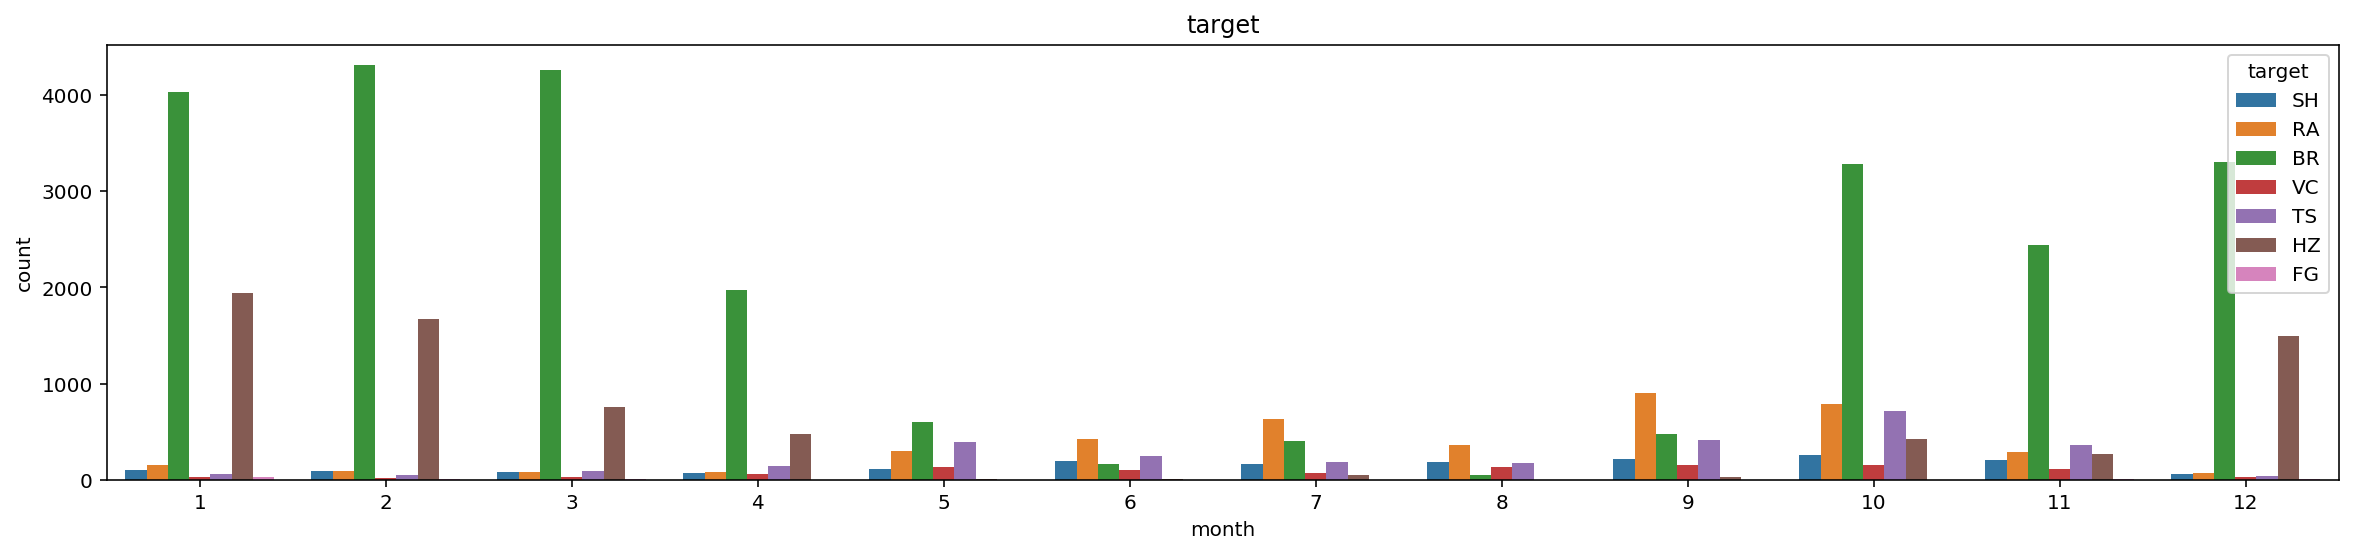

In [24]:
plt.figure(figsize=(20,4))
sns.countplot(x=df.month, hue="target", data=df).set_title('target')

## เช็คความสัมพันธ์ของข้อมูล

In [25]:
df_corr = df.copy()

In [26]:
# แปลงข้อมูล target ที่เป็น discrete ให้เป็น continuous

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_corr['target']  = labelencoder_X.fit_transform(df_corr['target'])
df_corr['skyc1']   = labelencoder_X.fit_transform(df_corr['skyc1']) 
df_corr['skyc2']   = labelencoder_X.fit_transform(df_corr['skyc2']) 
df_corr['skyc3']   = labelencoder_X.fit_transform(df_corr['skyc3']) 

In [27]:
dcorr = df_corr.corr()
dcorr[dcorr.index == 'target']

,day,month,year,tmpc,dwpc,relh,drct,sknt,alti,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,target
target,-0.002975,0.162926,-0.040452,0.2545,0.058543,0.000854,0.091642,0.151917,-0.046621,NaN,0.560276,-0.019785,0.047225,0.052172,-0.099989,-0.339079,-0.195754,1.0


In [28]:
#drop feature ที่ correlation ติดลบ
#drop feature year ในภายหลัง เนื่องจากต้องการนำไปเป็นตัวแปรในการทำ visualize
feature1 = ['day','alti','p01m','skyc1','skyl1','skyl2','skyl3']

df1 = df.drop(columns = feature1)

In [29]:
df1

,month,year,hour,tmpc,dwpc,relh,drct,sknt,vsby,skyc2,skyc3,target
0,7,2011,15:00:00,25.0,24.0,94.19,320.0,8.0,4.35,SCT,BKN,SH
1,7,2011,18:00:00,24.0,23.0,94.14,20.0,3.0,3.73,SCT,BKN,RA
2,7,2011,20:00:00,25.0,24.0,94.19,0.0,0.0,3.73,SCT,BKN,RA
3,1,2012,19:30:00,26.0,19.0,65.33,10.0,3.0,3.11,BKN,BKN,BR
4,1,2012,01:00:00,26.0,24.0,88.75,0.0,0.0,4.35,SCT,BKN,VC
...,...,...,...,...,...,...,...,...,...,...,...,...
111717,3,2018,22:30:00,27.0,23.0,78.76,230.0,6.0,1.86,SCT,BKN,BR
114575,10,2012,06:30:00,33.0,19.0,43.61,220.0,4.0,1.24,BKN,BKN,HZ
131398,10,2015,07:00:00,28.0,23.0,74.28,310.0,8.0,5.59,BKN,BKN,SH
131652,10,2015,07:00:00,30.0,22.0,62.25,10.0,12.0,5.59,BKN,BKN,SH


## จัดการกับข้อมูลที่เป็น outliner

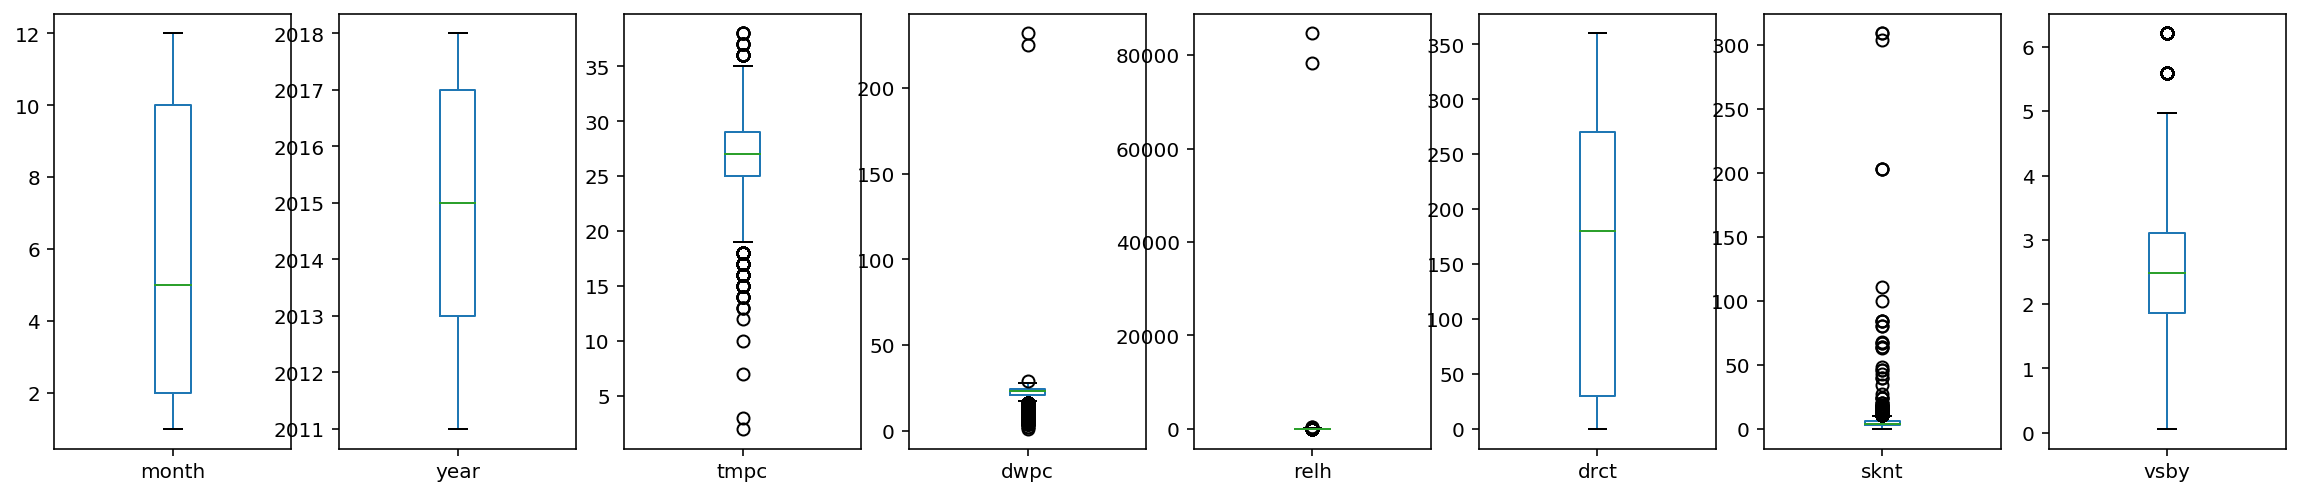

In [30]:
df1.plot(kind = 'box',subplots = True, figsize = (20,4));

In [31]:
def del_outliner(column_name):
    checkloop = 1
    count = 0
    global df1

    while checkloop == 1:
        count += 1
        # Calculate interquartile range (IQR = Q3-Q1)
        Q1 = df1[column_name].quantile(0.25)
        Q3 = df1[column_name].quantile(0.75)
        IQR = Q3 - Q1
        # Calculate Top & Bottom Border
        top_border = Q3 + (1.5 * IQR)
        bottom_border = Q1 - (1.5 * IQR)

        # The value each variable must more than 0 but bottom_border is minus value
        if bottom_border <= 0:
            bottom_border = 0

        # Find dataframe of outliers
        outliers = df1.query('{} <= {} | {} >= {} '.format(column_name,bottom_border,column_name,top_border)).copy()
        # Find dataframe of excluding outliers
        df1 = df1.query('{} > {} & {} < {} '.format(column_name,bottom_border,column_name,top_border)).copy()
        # If this loop have outliers, it will be redo again until no outliers
        if outliers[column_name].count() == 0:
            checkloop = 0
    return df1

In [32]:
outliner_col = ['tmpc', 'dwpc','relh','sknt','vsby']

for i in outliner_col:
    del_outliner(i)
    

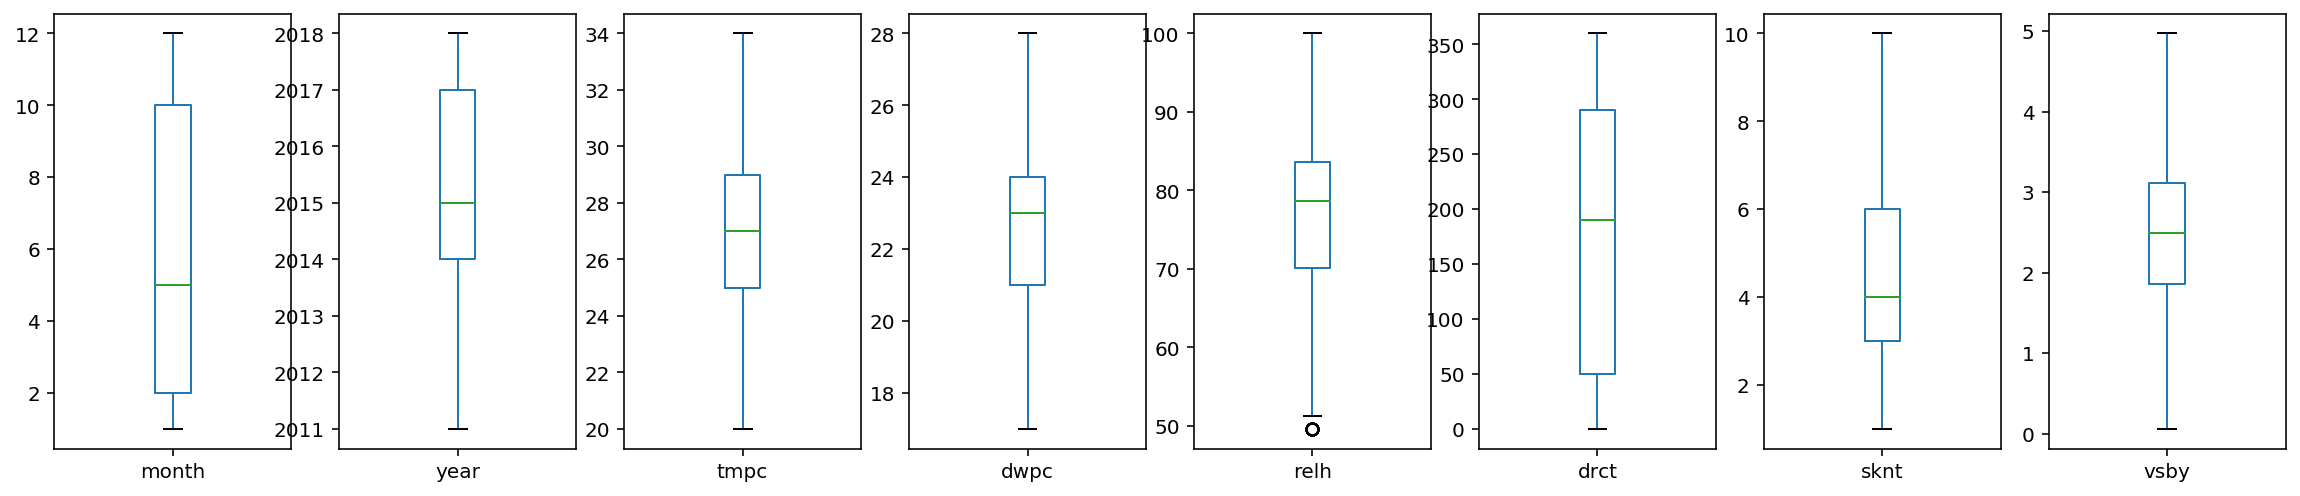

In [33]:
df1.plot(kind = 'box',subplots = True, figsize = (20,4));

In [34]:
df1

,month,year,hour,tmpc,dwpc,relh,drct,sknt,vsby,skyc2,skyc3,target
0,7,2011,15:00:00,25.0,24.0,94.19,320.0,8.0,4.35,SCT,BKN,SH
1,7,2011,18:00:00,24.0,23.0,94.14,20.0,3.0,3.73,SCT,BKN,RA
3,1,2012,19:30:00,26.0,19.0,65.33,10.0,3.0,3.11,BKN,BKN,BR
5,1,2012,01:30:00,27.0,25.0,88.83,290.0,2.0,4.35,SCT,BKN,VC
6,1,2012,02:00:00,26.0,25.0,94.23,160.0,4.0,3.73,BKN,BKN,SH
...,...,...,...,...,...,...,...,...,...,...,...,...
111509,3,2018,06:30:00,26.0,22.0,78.62,340.0,6.0,1.24,SCT,BKN,BR
111510,3,2018,07:00:00,24.0,21.0,83.32,50.0,8.0,1.24,SCT,BKN,BR
111550,3,2018,03:00:00,27.0,22.0,74.11,60.0,4.0,1.86,SCT,BKN,BR
111583,3,2018,19:30:00,24.0,21.0,83.32,350.0,6.0,1.86,SCT,BKN,BR


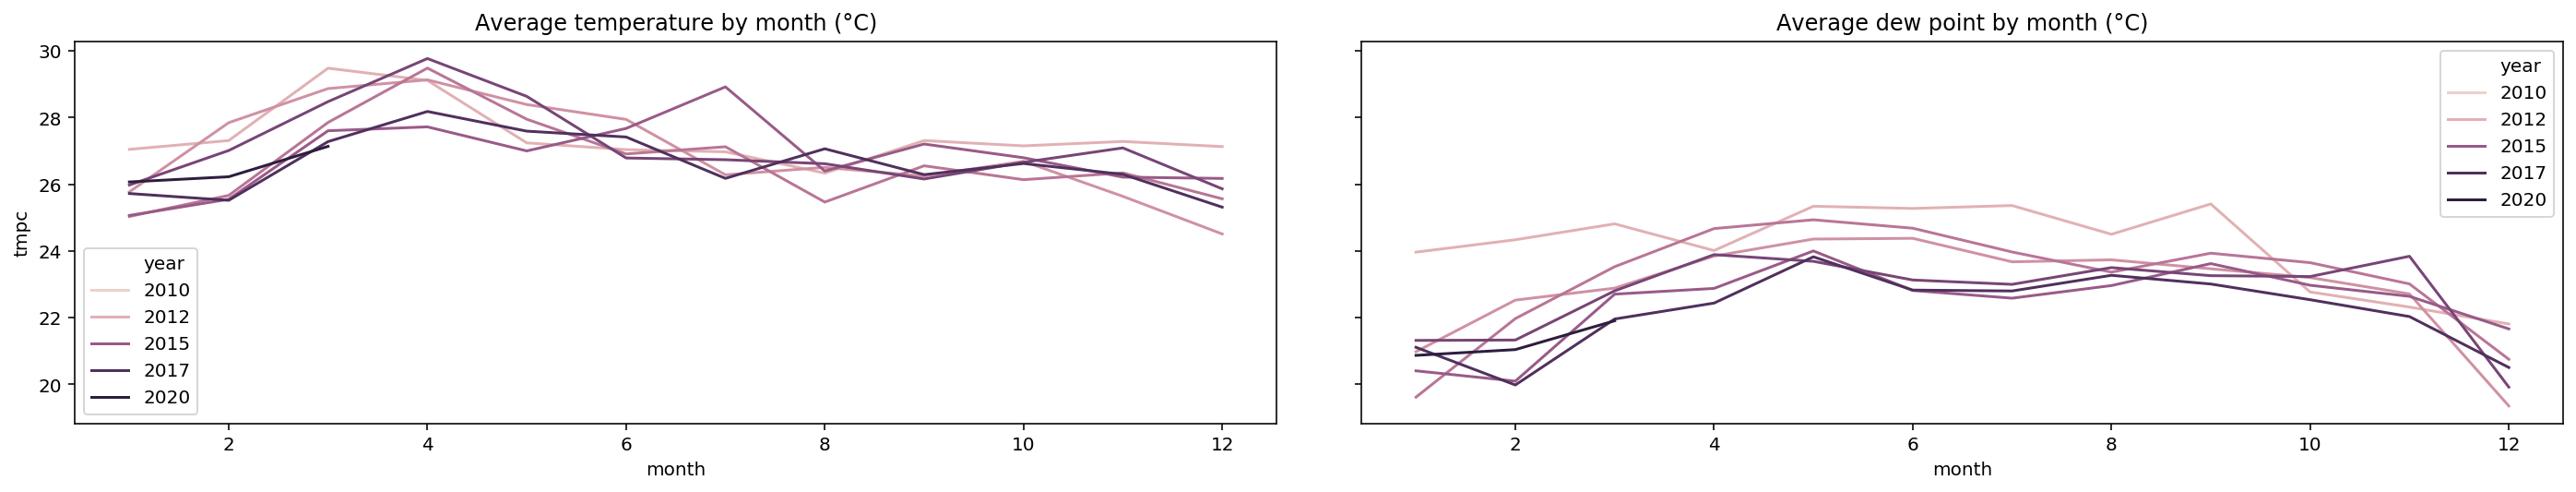

In [35]:
fig, ax = plt.subplots(1,2 , sharex=False, sharey=True, figsize=(20, 4))
fig. tight_layout(pad=3.0)

sns.lineplot(x='month',y='tmpc',hue="year",ax=ax[0] ,data=df1.groupby(['month','year']).mean().reset_index()).set_title('Average temperature by month (°C)') 
sns.lineplot(x='month',y='dwpc',hue="year",ax=ax[1] ,data=df1.groupby(['month','year']).mean().reset_index()).set_title('Average dew point by month (°C)')  

plt.show()

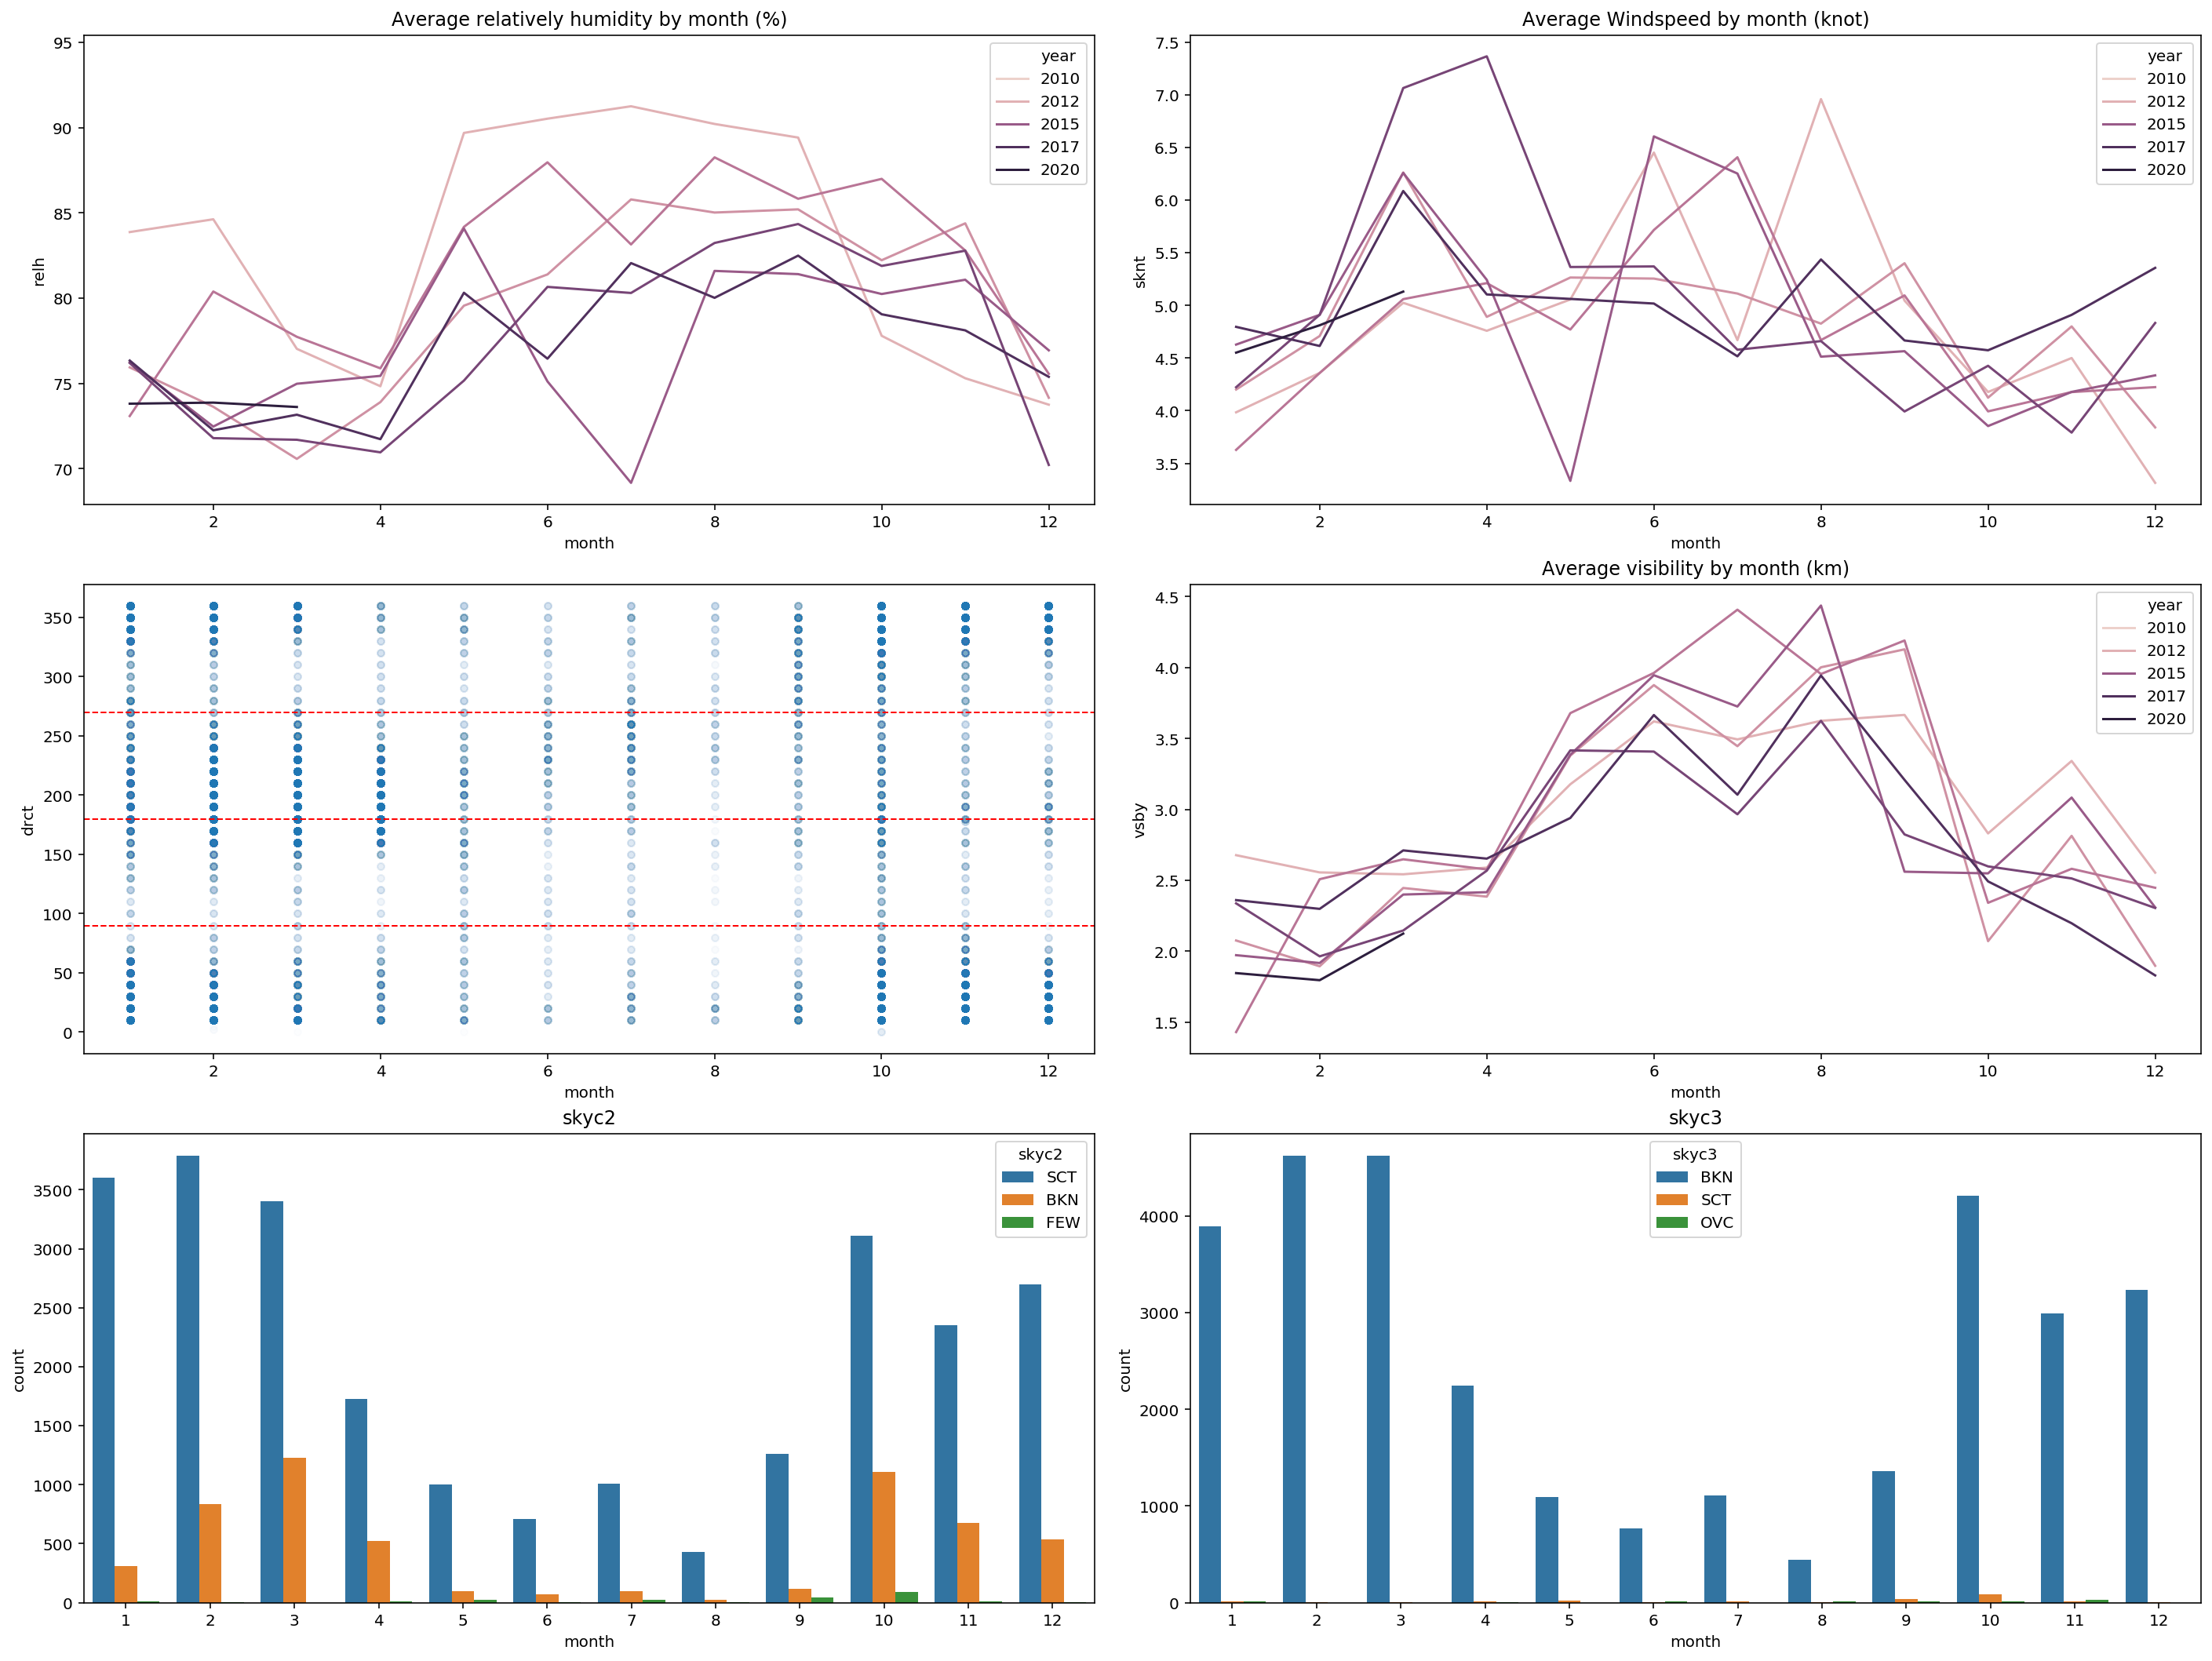

In [36]:
fig, ax = plt.subplots(3,2 , sharex=False, sharey=False, figsize=(20, 15))
fig. tight_layout(pad=3.0)


sns.lineplot(x='month',y='relh',hue="year",ax=ax[0,0] ,data=df1.groupby(['month','year']).mean().reset_index()).set_title('Average relatively humidity by month (%)') 
sns.lineplot(x='month',y='sknt',hue="year",ax=ax[0,1] ,data=df1.groupby(['month','year']).mean().reset_index()).set_title('Average Windspeed by month (knot)')   

graph = df1.plot.scatter(x = 'month', y='drct',ax=ax[1,0] ,alpha = 0.01)
graph.axhline(90,color='r',linestyle='--',linewidth=1)
graph.axhline(180,color='r',linestyle='--',linewidth=1)
graph.axhline(270,color='r',linestyle='--',linewidth=1)

sns.lineplot(x='month',y='vsby',hue="year",ax=ax[1,1] ,data=df1.groupby(['month','year']).mean().reset_index()).set_title('Average visibility by month (km)') 
sns.countplot(x=df1.month,      hue="skyc2",ax=ax[2,0],data=df1).set_title('skyc2');
sns.countplot(x=df1.month,      hue="skyc3",ax=ax[2,1],data=df1).set_title('skyc3');

Text(0.5, 1.0, 'target')

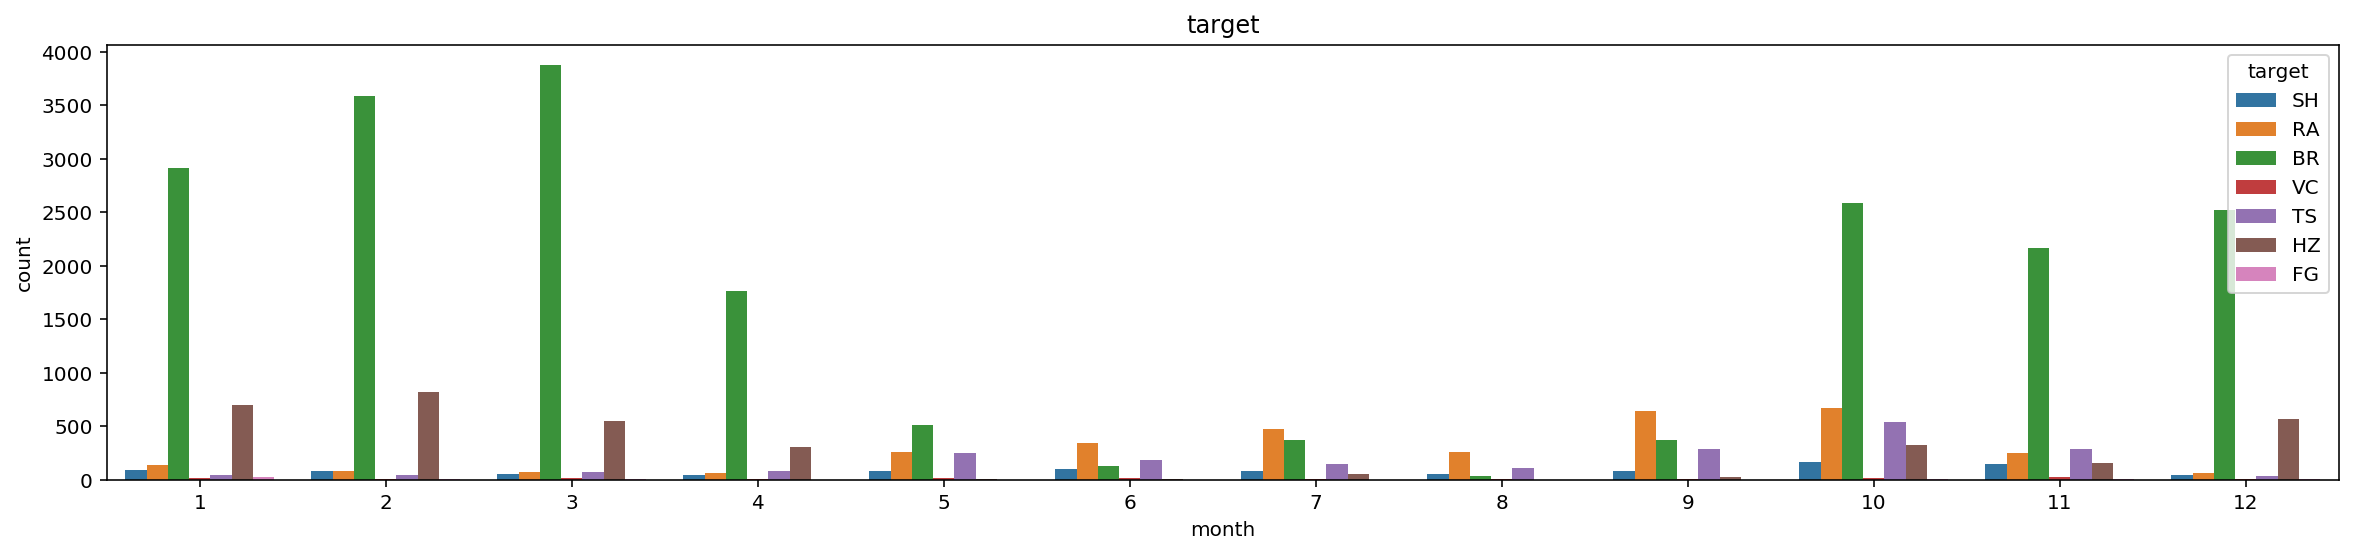

In [37]:
plt.figure(figsize=(20,4))
sns.countplot(x=df1.month, hue="target", data=df1).set_title('target')

In [38]:
df1 = df1.drop(columns = ['year','hour'])
df1

,month,tmpc,dwpc,relh,drct,sknt,vsby,skyc2,skyc3,target
0,7,25.0,24.0,94.19,320.0,8.0,4.35,SCT,BKN,SH
1,7,24.0,23.0,94.14,20.0,3.0,3.73,SCT,BKN,RA
3,1,26.0,19.0,65.33,10.0,3.0,3.11,BKN,BKN,BR
5,1,27.0,25.0,88.83,290.0,2.0,4.35,SCT,BKN,VC
6,1,26.0,25.0,94.23,160.0,4.0,3.73,BKN,BKN,SH
...,...,...,...,...,...,...,...,...,...,...
111509,3,26.0,22.0,78.62,340.0,6.0,1.24,SCT,BKN,BR
111510,3,24.0,21.0,83.32,50.0,8.0,1.24,SCT,BKN,BR
111550,3,27.0,22.0,74.11,60.0,4.0,1.86,SCT,BKN,BR
111583,3,24.0,21.0,83.32,350.0,6.0,1.86,SCT,BKN,BR


In [39]:
df1

,month,tmpc,dwpc,relh,drct,sknt,vsby,skyc2,skyc3,target
0,7,25.0,24.0,94.19,320.0,8.0,4.35,SCT,BKN,SH
1,7,24.0,23.0,94.14,20.0,3.0,3.73,SCT,BKN,RA
3,1,26.0,19.0,65.33,10.0,3.0,3.11,BKN,BKN,BR
5,1,27.0,25.0,88.83,290.0,2.0,4.35,SCT,BKN,VC
6,1,26.0,25.0,94.23,160.0,4.0,3.73,BKN,BKN,SH
...,...,...,...,...,...,...,...,...,...,...
111509,3,26.0,22.0,78.62,340.0,6.0,1.24,SCT,BKN,BR
111510,3,24.0,21.0,83.32,50.0,8.0,1.24,SCT,BKN,BR
111550,3,27.0,22.0,74.11,60.0,4.0,1.86,SCT,BKN,BR
111583,3,24.0,21.0,83.32,350.0,6.0,1.86,SCT,BKN,BR


---

# Model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [41]:
# กำหนดตัวแปร X และ Y ในการ train model

outcomename = 'target'
X = df1.drop(columns = outcomename)
Y = df1[outcomename]

### แบ่งข้อมูลเป็น training set และ test set

In [42]:
test_size = 0.2
random_state = 123
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = test_size, random_state = random_state)

print(f'training set = {X_train.shape[0]:5} records\ntest set     = {X_test.shape[0]:5} records')

training set = 24733 records
test set     =  6184 records


In [43]:
featurename = X.columns
outcome_value = ['1', '2', '3', '4', '5', '6', '7']

In [44]:
# แปลงข้อมูล discrete ให้เป็น continuous

X_train['skyc2'] = X_train['skyc2'].map({'SCT':1, 'BKN':2, 'FEW':3})
X_test['skyc2']  = X_test['skyc2'].map({'SCT':1, 'BKN':2, 'FEW':3})

X_train['skyc3'] = X_train['skyc3'].map({'SCT':1,'BKN':2,'OVC':3})
X_test['skyc3']  = X_test['skyc3'].map({'SCT':1,'BKN':2,'OVC':3})

y_train = y_train.map({'BR':1 ,'HZ':2 ,'RA':3,'TS':4,'SH':5,'VC':6,'FG':7})
y_test  = y_test.map({'BR':1,'HZ':2 ,'RA':3,'TS':4,'SH':5,'VC':6,'FG':7})

# **Decision Tree**

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
# grid search to config hyparameter
def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 100)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [47]:
grid_search_value = dtree_grid_search(X_train,y_train,2)

In [48]:
DTree_Clf = DecisionTreeClassifier(criterion = grid_search_value['criterion'],
                                   max_depth = grid_search_value['max_depth'],
                                   random_state = 0)
DTree_Clf = DTree_Clf.fit(X_train, y_train)

# **Naive Bayes** 

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# **Bagging**

In [51]:
from sklearn.ensemble import BaggingClassifier

In [52]:
tree1 = DecisionTreeClassifier(criterion=grid_search_value['criterion'],
                               max_depth =grid_search_value['max_depth'],
                               random_state = 0)

bagging_tree = BaggingClassifier(base_estimator=tree1,
                                 n_estimators=500,
                                 max_samples=1.0)

bagging_tree = bagging_tree.fit(X_train, y_train) 

# **Boosting**

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
Tree = DecisionTreeClassifier(criterion=grid_search_value['criterion'],
                              max_depth =grid_search_value['max_depth'],
                              random_state = 0)

boosting = AdaBoostClassifier(base_estimator=Tree,
                              n_estimators=50)

boosting = boosting.fit(X_train, y_train)

# **Random Forest**

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# **XGboost**

In [57]:
import xgboost
from xgboost import XGBClassifier, plot_importance

In [58]:
xgb = XGBClassifier(gamma=0,
                    learning_rate=0.1,
                    max_depth=3,
                    n_estimators=100)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [59]:
xgb2 = XGBClassifier(gamma=0,
                    learning_rate=0.1,
                    max_depth=19,
                    eta = 0.01,
                    subsample = 1,
                    colsample_bytree = 1,
                    validate_parameters = 1)
                    
xgb2.fit(X_train,y_train) 

[15:10:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { importance_type, missing, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=19,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=1, verbosity=None)

# Conclusion

In [60]:
# predict test data

DT_y_pred_test = DTree_Clf.predict(X_test)
NB_y_pred_test = gnb.predict(X_test)
bagging_y_pred_test  = bagging_tree.predict(X_test)
boosting_y_pred_test  = boosting.predict(X_test)
rf_y_pred_test =  rf.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)
xgb2_y_pred_test = xgb2.predict(X_test)

model_name = ['Decision_tree', 'Naive bayes', 'Bagging_tree',
              'Boosting_tree', 'Random_forest', 'Xgboost',
              'Xgboost2']

pred = [DT_y_pred_test,NB_y_pred_test, bagging_y_pred_test, 
        boosting_y_pred_test, rf_y_pred_test,xgb_y_pred_test,
        xgb2_y_pred_test]

In [61]:
# Define function accuracy .
Acc = lambda predict : accuracy_score(y_test,predict)*100
B_Acc = lambda pred : balanced_accuracy_score(y_test,pred)*100

# Apply function to each prediction in pred list. (HADOOP concept)
Accuracy = list(map(Acc, pred))
balanced_accuracy = list(map(B_Acc, pred))

# Match model name and Accuracy 
Accuracy = zip(model_name, Accuracy)
balanced_accuracy = zip(model_name, balanced_accuracy)

# Sort by Accuracy 
Accuracy = sorted(Accuracy, key = lambda x: x[1], reverse = True)
balanced_accuracy = sorted(balanced_accuracy, key = lambda x: x[1], reverse = True)

[print('Model: {:20} Accuracy: {:.2f}'.format(*pair)) for pair in Accuracy]
print('-'*80)
[print('Model: {:20} balanced_accuracy: {:.2f}'.format(*pair)) for pair in balanced_accuracy];

Model: Xgboost              Accuracy: 82.58
Model: Bagging_tree         Accuracy: 82.18
Model: Decision_tree        Accuracy: 81.61
Model: Random_forest        Accuracy: 76.49
Model: Xgboost2             Accuracy: 76.10
Model: Naive bayes          Accuracy: 71.91
Model: Boosting_tree        Accuracy: 68.42
--------------------------------------------------------------------------------
Model: Xgboost              balanced_accuracy: 53.78
Model: Naive bayes          balanced_accuracy: 52.33
Model: Bagging_tree         balanced_accuracy: 51.92
Model: Xgboost2             balanced_accuracy: 51.05
Model: Decision_tree        balanced_accuracy: 50.85
Model: Boosting_tree        balanced_accuracy: 50.48
Model: Random_forest        balanced_accuracy: 50.07


# Phase2 predict future feature

In [62]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [63]:
#ใช้ ipywidget ในการเลือกวันเริ่มต้น และ สิ้นสุดของการ prediction

first = widgets.DatePicker(description='Start date',disabled=False)
last = widgets.DatePicker(description='End date', disabled=False)

In [64]:
first

DatePicker(value=None, description='Start date')

In [65]:
last

DatePicker(value=None, description='End date')

In [67]:
# นำข้อมูลวันที่ ที่ได้จากการใส่ข้อมูลวันที่ มาสร้าง dataframe เพื่อ predictหา feature

predict = []
for j in pd.date_range(first.value,last.value,freq = '0.5H'):
    predict.append(j)

test = pd.DataFrame(predict,columns=['valid'])
test['day'] = test['valid'].dt.day
test['month'] = test['valid'].dt.month
test['hour'] = test['valid'].dt.strftime("%H:%M:%S")
test.drop(columns = ['valid'],inplace = True)

In [68]:
# สร้าง function ในการทำ moving average เพื่อหา feature

def predict_feature(month,day,hour,index):
    filter = df[(df['month'] <= month)&(df['day'] <= day)&(df['hour'] <= hour)]
    filter.sort_values(by=['month','day','hour']).tail(10)
    for i in ['tmpc', 'dwpc', 'relh', 'drct', 'sknt', 'alti', 'p01m', 'vsby', 'skyl1', 'skyl2', 'skyl3']:
        value_i = filter[i].rolling(window = 5).mean()
        test.at[index,i] = value_i.iloc[-1]
        for j in['skyc1', 'skyc2', 'skyc3']:
            value_j = filter[j].mode()
            test.at[index,j] = value_j.iloc[-1]
        
    return test

In [69]:
# นำ dataframeวันที่ ที่ได้จากการใส่ข้อมูลมาสร้าง feature ในการ predict ข้อมูล ด้วยวิธีการ moving average 

for i in test.index:
    predict_feature( test.at[i,'month'],test.at[i,'day'],test.at[i,'hour'],i)

    
#แปลงข้อมูล test set ให้อยู่ในรูปเดียวกันกับ train set ที่ใช้ทำการสร้าง

test_data = test.drop(columns = ['day','hour','alti','p01m','skyl1','skyl2','skyl3'])
test_data = test_data[['month','tmpc','dwpc','relh','drct','sknt','vsby','skyc2','skyc3']]
test_data['skyc2'] = test_data['skyc2'].map({'SCT':1, 'BKN':2, 'FEW':3})
test_data['skyc3'] = test_data['skyc3'].map({'SCT':1,'BKN':2,'OVC':3})

In [70]:
# นำ model มา predict ข้อมูล

xgb_y_pred_test = xgb.predict(test_data)
test['target'] = xgb_y_pred_test

test['target'] = test['target'].map({1:'BR' ,2:'HZ' ,3:'RA',4:'TS',5:'SH',6:'VC',7:'FG'})

In [71]:
test

,day,month,hour,tmpc,skyc1,skyc2,skyc3,dwpc,relh,drct,sknt,alti,p01m,vsby,skyl1,skyl2,skyl3,target
0,1,3,00:00:00,23.6,NSC,SCT,BKN,18.4,74.176,218.0,4.2,29.880,0.0,1.986,2012.753742,16860.123664,22584.008320,BR
1,1,3,00:30:00,24.8,FEW,SCT,BKN,22.0,84.470,216.0,3.4,29.854,0.0,1.860,2000.000000,13645.092748,22584.008320,BR
2,1,3,01:00:00,25.0,FEW,SCT,BKN,22.2,84.492,216.0,3.0,29.844,0.0,1.860,2000.000000,16860.123664,22584.008320,BR
3,1,3,01:30:00,25.8,FEW,SCT,BKN,22.4,81.696,184.0,3.0,29.840,0.0,1.986,2000.000000,20075.154580,22584.008320,BR
4,1,3,02:00:00,26.4,FEW,SCT,BKN,22.6,79.988,158.0,3.4,29.824,0.0,2.236,2000.000000,20075.154580,22584.008320,BR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,30,5,22:00:00,26.2,FEW,SCT,BKN,22.0,77.928,186.0,6.8,29.806,0.0,2.358,1800.000000,4900.000000,17550.404992,BR
4365,30,5,22:30:00,26.4,FEW,SCT,BKN,22.2,77.956,164.0,6.8,29.818,0.0,2.482,1800.000000,4900.000000,17550.404992,BR
4366,30,5,23:00:00,26.4,FEW,SCT,BKN,22.2,77.956,164.0,6.8,29.818,0.0,2.482,1800.000000,4900.000000,17550.404992,BR
4367,30,5,23:30:00,26.4,FEW,SCT,BKN,22.2,77.956,164.0,6.8,29.818,0.0,2.482,1800.000000,4900.000000,17550.404992,BR


In [72]:
# function ในการ filter ผลของการแสดงค่า prediction 

from statistics import *
@interact(Option=['every 30 min','by day'])
def show_value(Option):
    global way
    if Option == 'by day':
        way =  test.groupby(['day','month'])['target'].agg(mode).to_frame().reset_index()
        return way
    else:
        way =  test[['day','month','hour','target']]
        return way


interactive(children=(Dropdown(description='Option', options=('every 30 min', 'by day'), value='every 30 min')…

In [73]:
way.target.value_counts()

BR    3794
RA     542
TS      19
SH      14
Name: target, dtype: int64